Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


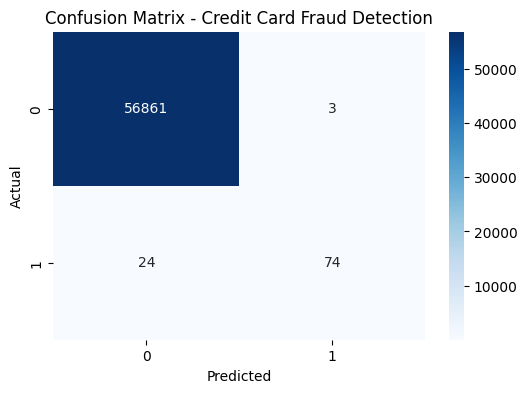


Evaluation Metrics:
Accuracy : 0.9995
Precision: 0.9610
Recall   : 0.7551


In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# 1. Load the dataset with encoding handling
df = pd.read_csv('/content/7. Predict Credit Card Fraud.csv', encoding='ISO-8859-1')  # treating as credit_fraud.csv

# 2. Preview data and check columns
print("Columns:", df.columns.tolist())
print("Class distribution:\n", df['Class'].value_counts())

# 3. Define features and target
X = df.drop(['Class', 'Time'], axis=1, errors='ignore')  # Drop 'Time' if it exists
y = df['Class']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Train the model
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Credit Card Fraud Detection')
plt.show()

# 7. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
